In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
train_data = pd.read_csv('data/train.csv')

In [10]:
print("Training data size",train_data.shape)

('Training data size', (1225029, 3))


In [11]:
train_data = train_data.mask(train_data.astype(object).eq('None')).dropna()
train_data.landmark_id = pd.to_numeric(train_data.landmark_id, errors='coerce')

print("Training data (valid) size",train_data.shape)

('Training data (valid) size', (1211404, 3))


In [12]:
# now open the URL
temp = 215
print('id', train_data['id'].iloc[temp])
print('url:', train_data['url'].iloc[temp])
print('landmark id:', train_data['landmark_id'].iloc[temp])

('id', '7e3b659397e89173')
('url:', 'http://lh5.ggpht.com/-WIucg8Op3N8/TpKNjNzW_xI/AAAAAAAAAxE/impz5TYeDM0/s1600/')
('landmark id:', 12065)


In [15]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts())
print ("Landmark size:", temp.shape)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp


('Landmark size:', (14951, 1))


,landmark_id,count
0,9633,49858
1,6051,49651
2,6599,23149
3,9779,18241
4,2061,13138
5,5554,10993
6,6651,9417
7,5376,9138


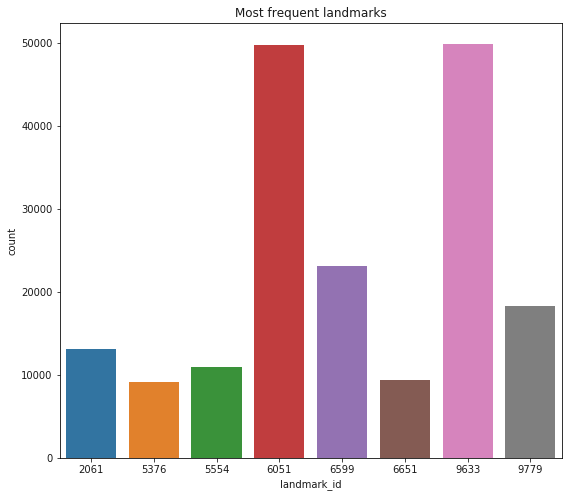

In [16]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [20]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(50))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,9608,1
1,1033,1
2,7815,1
3,5575,1
4,6798,1
5,9246,1
6,7598,1
7,6423,1
8,10151,1
9,8615,1


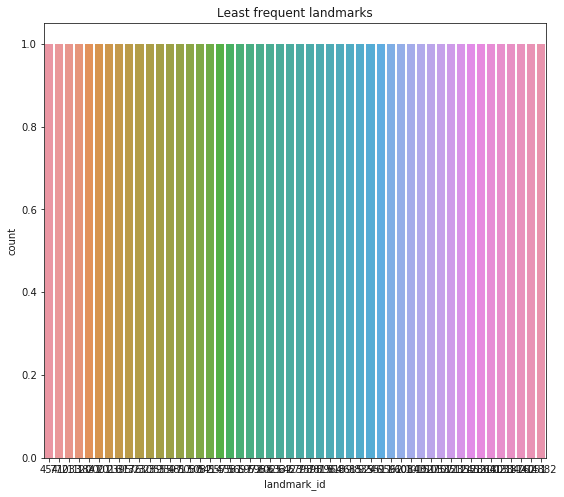

In [21]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [22]:
# Unique URL's
train_data.nunique()

id             1211404
url            1211404
landmark_id      14951
dtype: int64

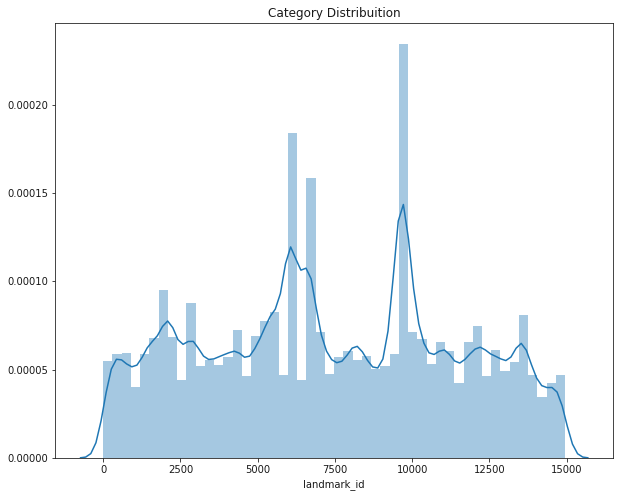

In [23]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

In [29]:
print("Number of classes under 20 occurences",(train_data['landmark_id'].value_counts() <= 300).sum(),'out of total number of categories',len(train_data['landmark_id'].unique()))

('Number of classes under 20 occurences', 14219, 'out of total number of categories', 14951)


In [147]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join(["<img style='"+ img_style +"' src='"+ u +"' />" for _, u in urls.head(12).iteritems()])
    display(HTML(images_list))

In [148]:
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [149]:
category = train_data['landmark_id'].value_counts().keys()[1]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [150]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

In [151]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

('Training data size', (1213778, 4))
('test data size', (114321, 3))


In [152]:
train_data.head(8)

,id,url,landmark_id,site_name
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/...,6347,lh4.ggpht.com
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA...,12519,lh5.googleusercontent.com
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medi...,264,mw2.google.com
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/...,13287,lh3.ggpht.com
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/...,4018,lh6.ggpht.com
5,056708de792326b9,https://lh3.googleusercontent.com/-nbz_XT1dGz4...,5046,lh3.googleusercontent.com
6,6ae1e206c579f649,https://lh6.googleusercontent.com/-onL5-pK9nZI...,5554,lh6.googleusercontent.com
7,7b1e476a7c89bb34,http://lh5.ggpht.com/-3GWjPriaA9g/Sg3e_S0qEgI/...,12220,lh5.ggpht.com


In [153]:
test_data.head()

,id,url,site_name
0,cb9998b8cdaf6235,https://lh3.googleusercontent.com/-q8B91vDIQZY...,lh3.googleusercontent.com
1,30728cf6e50a6bc6,https://lh3.googleusercontent.com/-91gJSKTgv5Q...,lh3.googleusercontent.com
2,16afbc86b710337d,https://lh3.googleusercontent.com/-GHZdXuf2wMg...,lh3.googleusercontent.com
3,d29b2166cf522450,https://lh3.googleusercontent.com/-cWDnYNQhyws...,lh3.googleusercontent.com
4,dd5c03b20c21cfba,https://lh3.googleusercontent.com/-PSLN6BloM-k...,lh3.googleusercontent.com


In [154]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,179924
1,lh4.googleusercontent.com,175811
2,lh5.googleusercontent.com,173589
3,lh6.googleusercontent.com,169889
4,lh3.ggpht.com,104132
5,lh4.ggpht.com,101593
6,lh6.ggpht.com,101273
7,lh5.ggpht.com,100103
8,mw2.google.com,94481
9,static.panoramio.com,12394


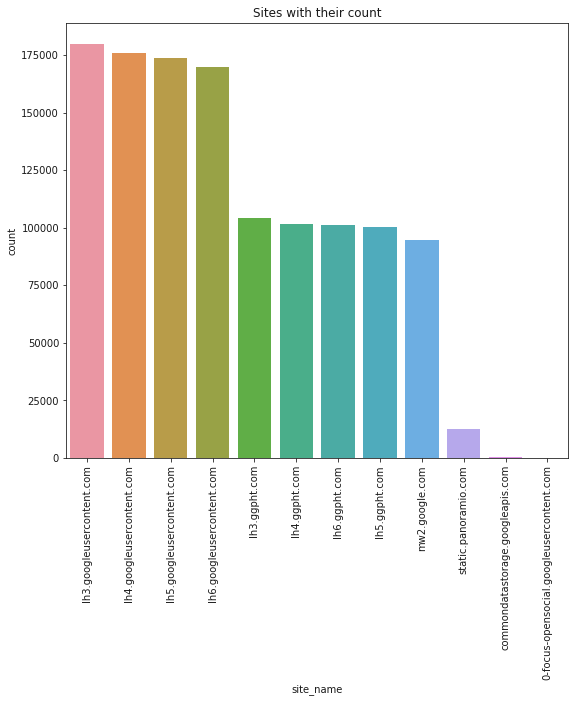

In [155]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [156]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,113537
1,lh3.ggpht.com,148
2,lh5.ggpht.com,130
3,lh4.ggpht.com,118
4,images1-focus-opensocial.googleusercontent.com,92
5,lh6.ggpht.com,90
6,lh5.googleusercontent.com,77
7,lh4.googleusercontent.com,51
8,static.panoramio.com,44
9,lh6.googleusercontent.com,25


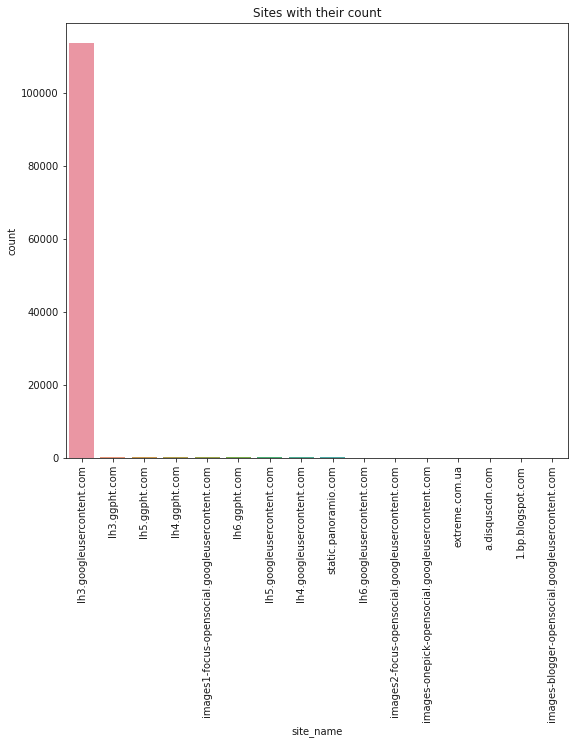

In [157]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()